# End to end Project

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder # for Embarked feature
from sklearn.preprocessing import OneHotEncoder # for Sex feature
from sklearn.preprocessing import StandardScaler # for Fare feature
from sklearn.model_selection import RandomizedSearchCV # for Hyper parameter Tuning
from sklearn.ensemble import RandomForestClassifier # Algo to train my model
from sklearn.metrics import accuracy_score,classification_report # to check accuracy of the model
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(labels='PassengerId',axis=1,inplace=True)

# Exploratory Data Analysis

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Visualization(For Univeriate and MultiVariate Analysis)

In [9]:
class Analysis():
    @classmethod
    def UniveriateAnalysis_cat(cls,col_name,ncols=2):
        plt.subplots(nrows=1,ncols=ncols,figsize = (17,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(data=df,x=df[col_name])
        for i in ax.containers:
            ax.bar_label(i)
        plt.subplot(1,2,ncols)
        plt.title(col_name)
        df[col_name].value_counts().plot(kind = 'pie',autopct ='%.2f')
        print('there are',df[col_name].isnull().sum() , 'null values in', col_name, 'Feature')
        print('----------------------------------')
        print('value counts of feature',df[col_name].value_counts())
    
    @classmethod
    def UniveriateAnalysis_num(cls,col_name,ncols:int):
        plt.subplots(nrows=1,ncols=ncols,figsize= (20,6))
        plt.subplot(1,ncols,1)
        sns.boxplot(data=df,y=df[col_name])
        plt.subplot(1,ncols,2)
        sns.histplot(data=df,x=col_name,kde=True,color='g')
        print('there are',df[col_name].isnull().sum() , 'null values in', col_name, 'Feature')
        


## *Univeriate Analysis*

### **Survived**

there are 0 null values in Survived Feature
----------------------------------
value counts of feature Survived
0    549
1    342
Name: count, dtype: int64


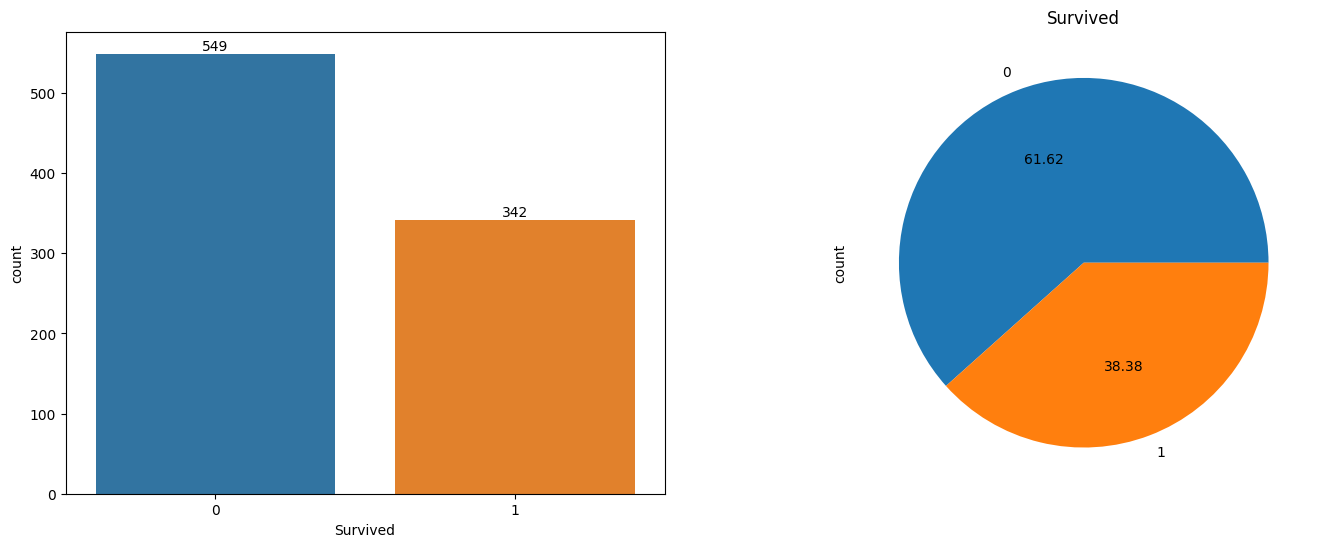

In [10]:
Analysis.UniveriateAnalysis_cat(col_name='Survived')

### Pclass

there are 0 null values in Pclass Feature
----------------------------------
value counts of feature Pclass
3    491
1    216
2    184
Name: count, dtype: int64


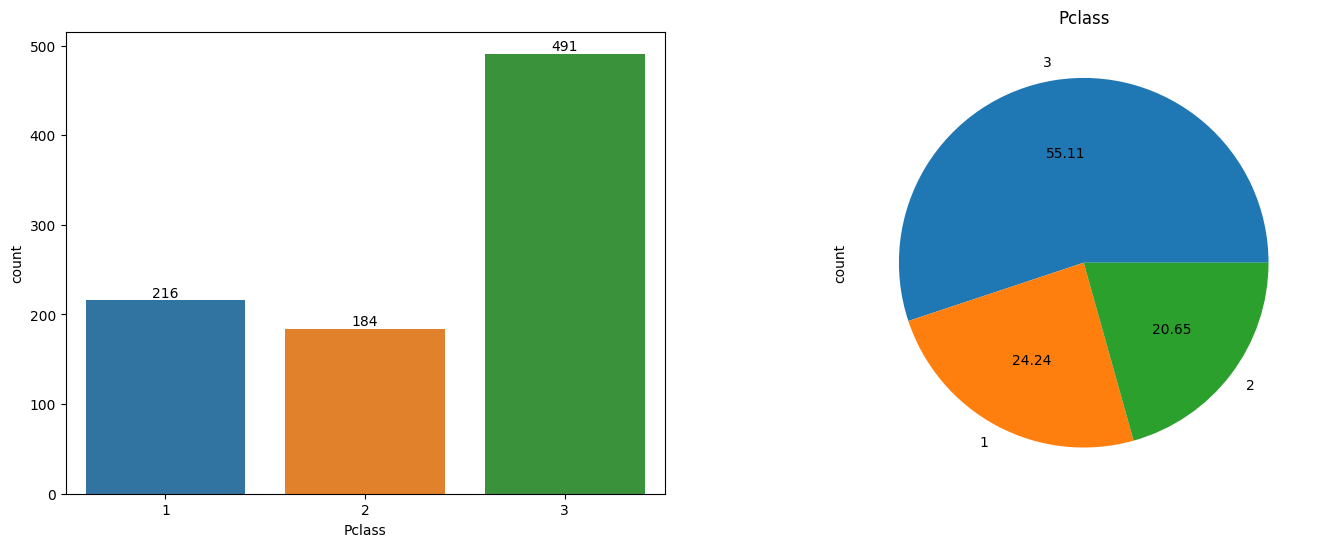

In [11]:
Analysis.UniveriateAnalysis_cat(col_name='Pclass')

### **Sex**

there are 0 null values in Sex Feature
----------------------------------
value counts of feature Sex
male      577
female    314
Name: count, dtype: int64


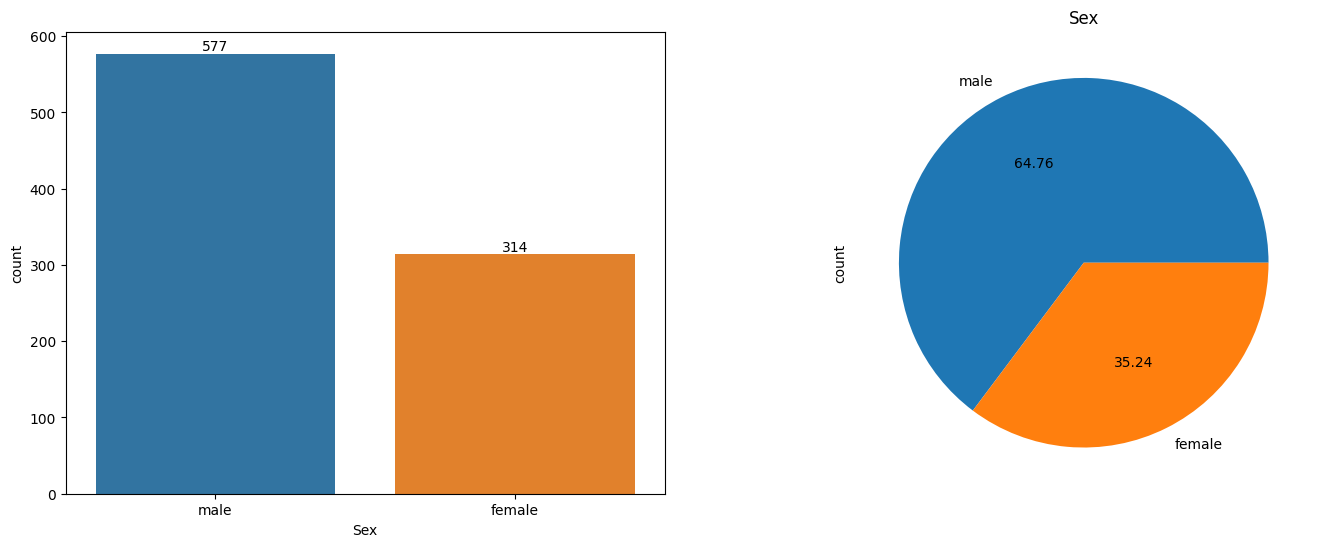

In [12]:
Analysis.UniveriateAnalysis_cat(col_name='Sex')

### **SibSp**

there are 0 null values in SibSp Feature
----------------------------------
value counts of feature SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


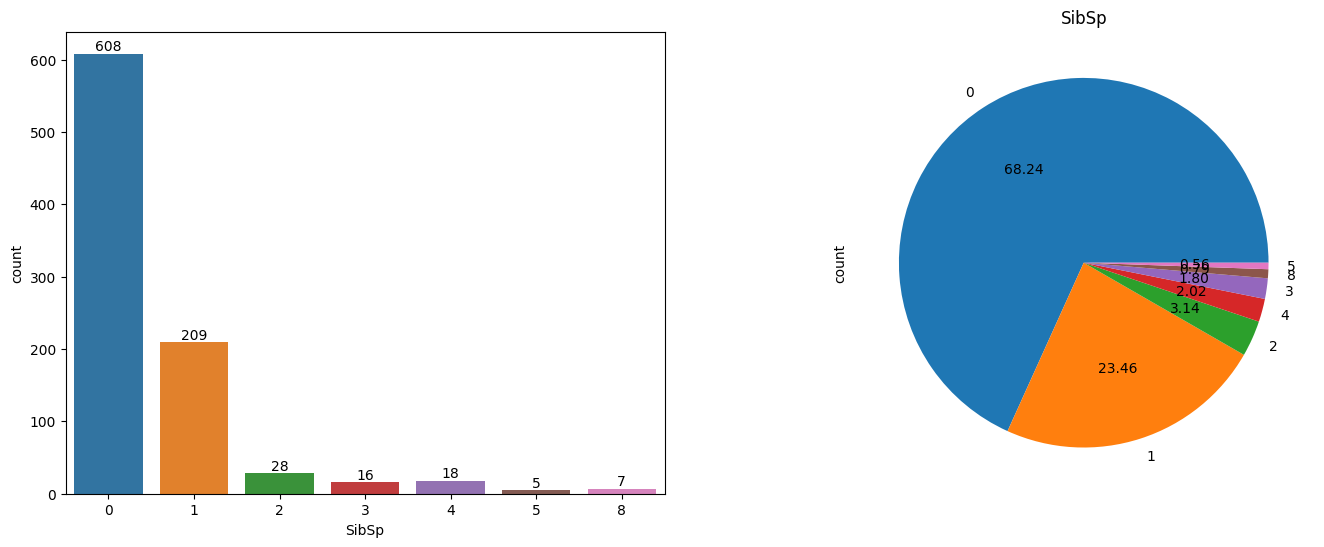

In [13]:
Analysis.UniveriateAnalysis_cat('SibSp')

### **Parch**

there are 0 null values in Parch Feature
----------------------------------
value counts of feature Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


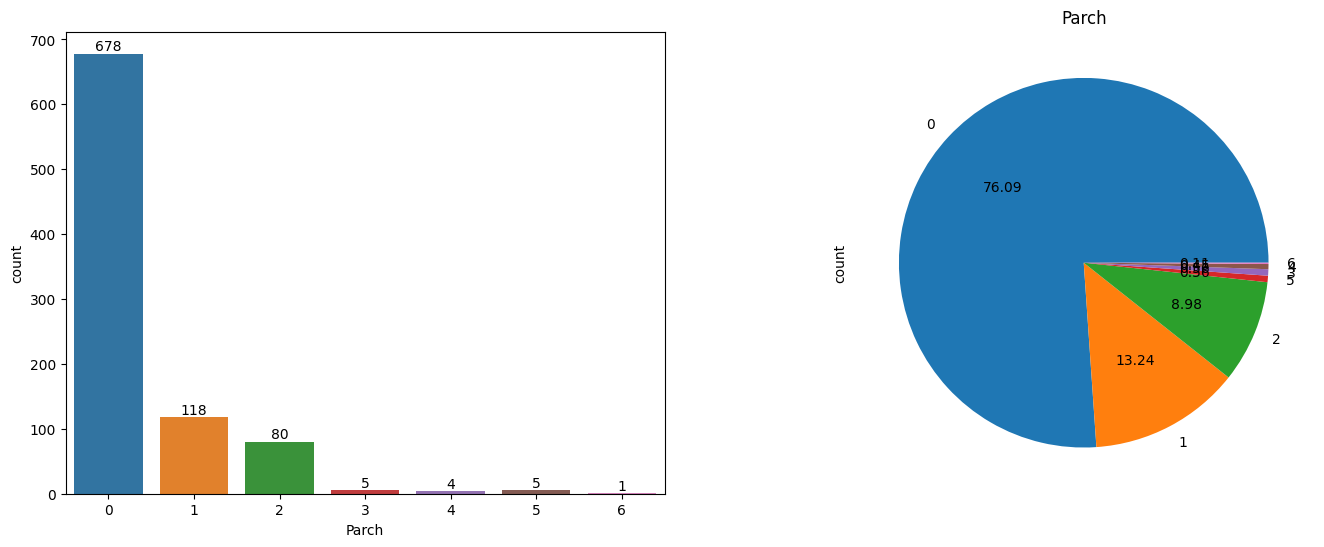

In [14]:
Analysis.UniveriateAnalysis_cat('Parch')

there are 2 null values in Embarked Feature
----------------------------------
value counts of feature Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


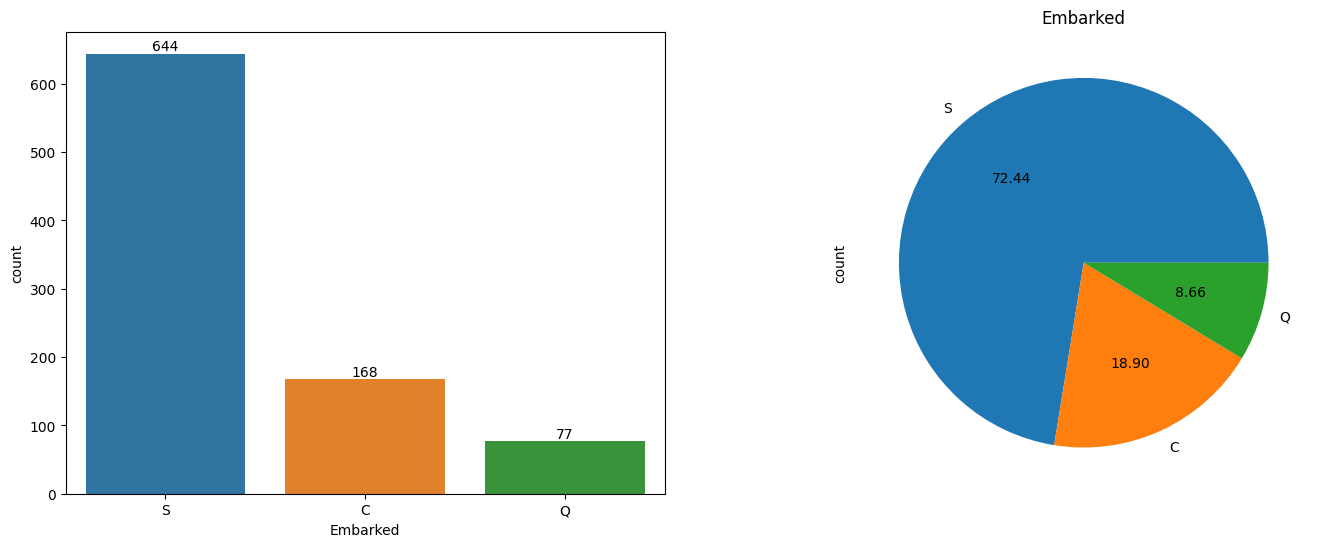

In [15]:
Analysis.UniveriateAnalysis_cat('Embarked')

there are 177 null values in Age Feature


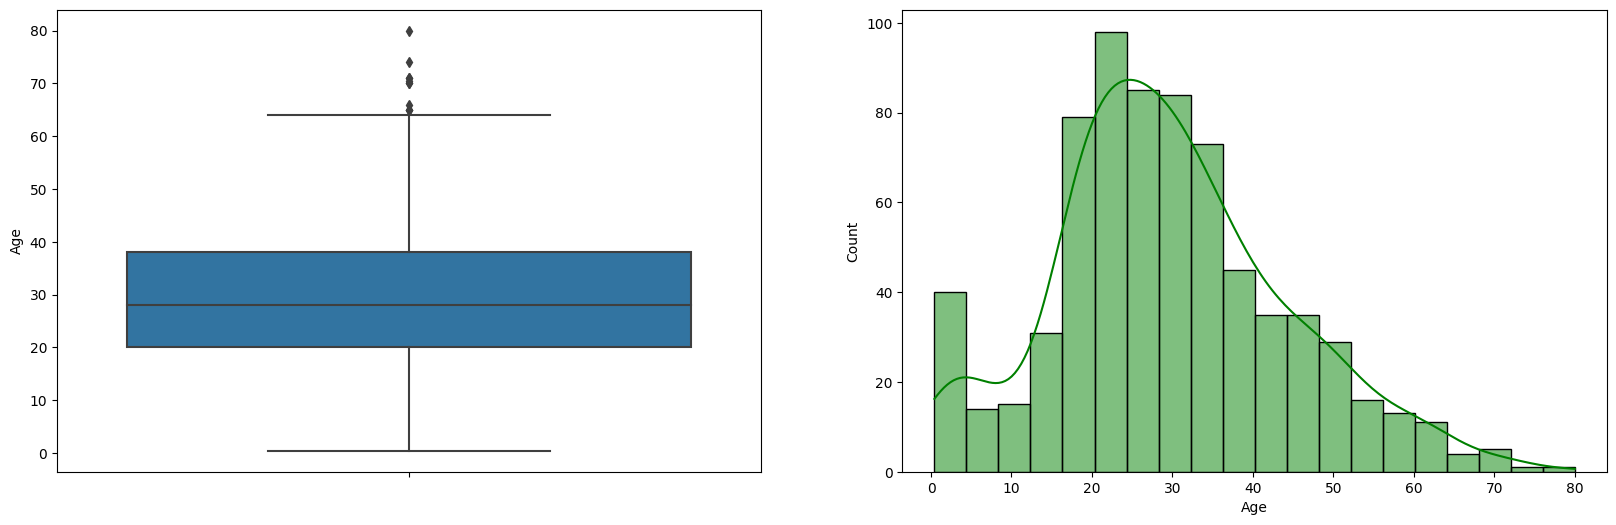

In [16]:
Analysis.UniveriateAnalysis_num(col_name='Age',ncols=2)

# Handling Missing Values

## *Age*
 - filling missing data with mean Or median is not good idea So I am gonna to fill missing values in the range of `mean + Standard deviation and mean - standard deviation`
- converting dtype
- I would not remove Outliers because outliers are good 

In [17]:
mean = df['Age'].mean()
std = df['Age'].std()
# random numbers 
rand_age = np.random.randint(low=mean-std,high=mean+std,size=df['Age'].isnull().sum())
# filling NaN values
age_copy = df['Age'].copy()
age_copy[np.isnan(age_copy)] = rand_age
df['Age'] = age_copy
# converting dtype 
df['Age'] = df['Age'].astype('int64')

there are 0 null values in Age Feature


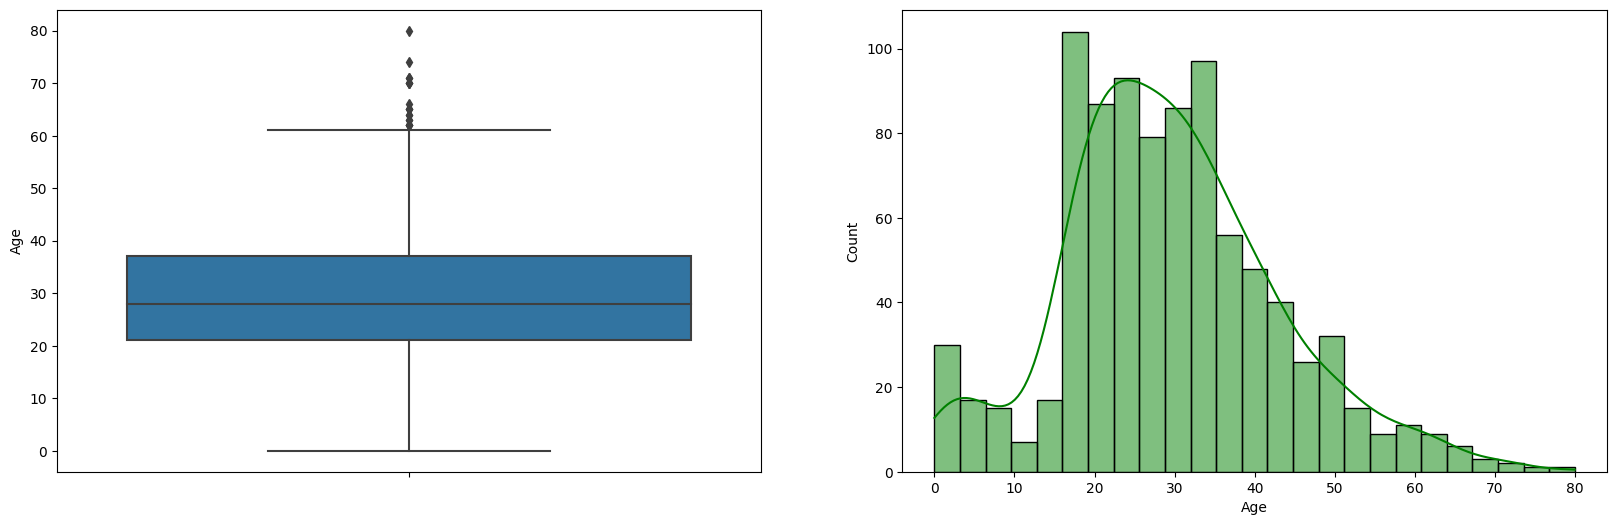

In [18]:
Analysis.UniveriateAnalysis_num('Age',ncols=2)

## *Cabin*
Droping Cabin is good Idea because

In [19]:
df.drop(labels='Cabin',axis=1,inplace=True)

## *Ticket*
Ticket column does not make sense for me so Droping

In [20]:
df.drop(labels='Ticket',axis=1,inplace=True)

## *Fare*
fare feature should in round figure

In [21]:
df['Fare'] = round(df['Fare'])

## *Name*
Name feature do not hold any significance So droping name

In [22]:
df.drop('Name',axis=1,inplace=True)

## *Embarked*
Replacing with mode will be good


there are 2 null values in Embarked Feature
----------------------------------
value counts of feature Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


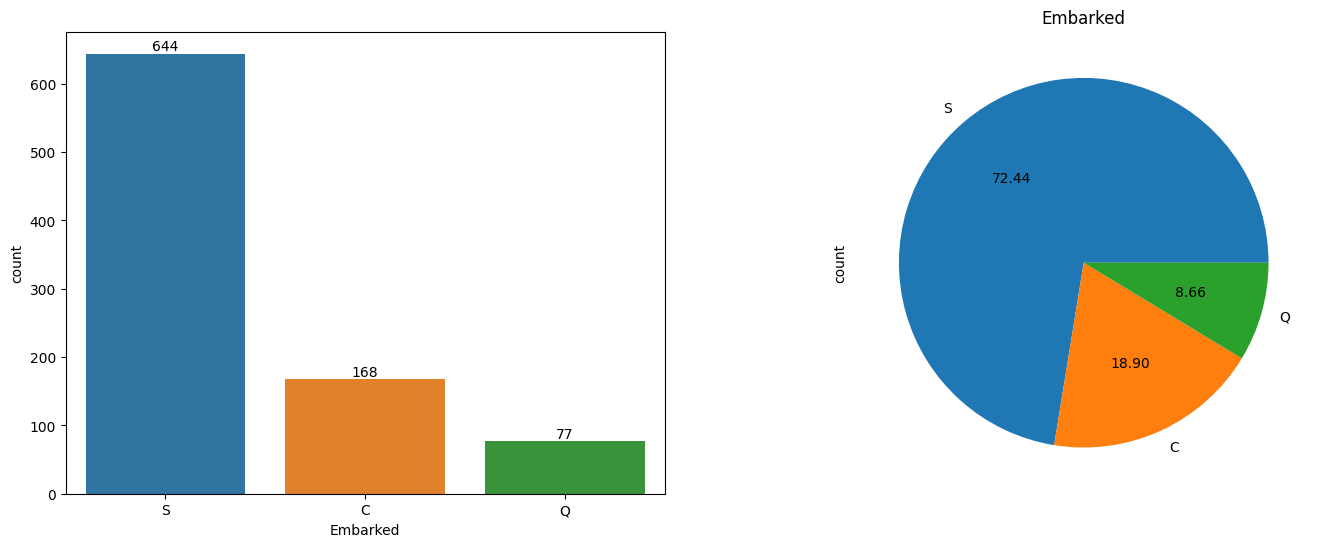

In [23]:
Analysis.UniveriateAnalysis_cat('Embarked')

In [24]:
df['Embarked'] = df['Embarked'].fillna(value='S')

there are 0 null values in Embarked Feature
----------------------------------
value counts of feature Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


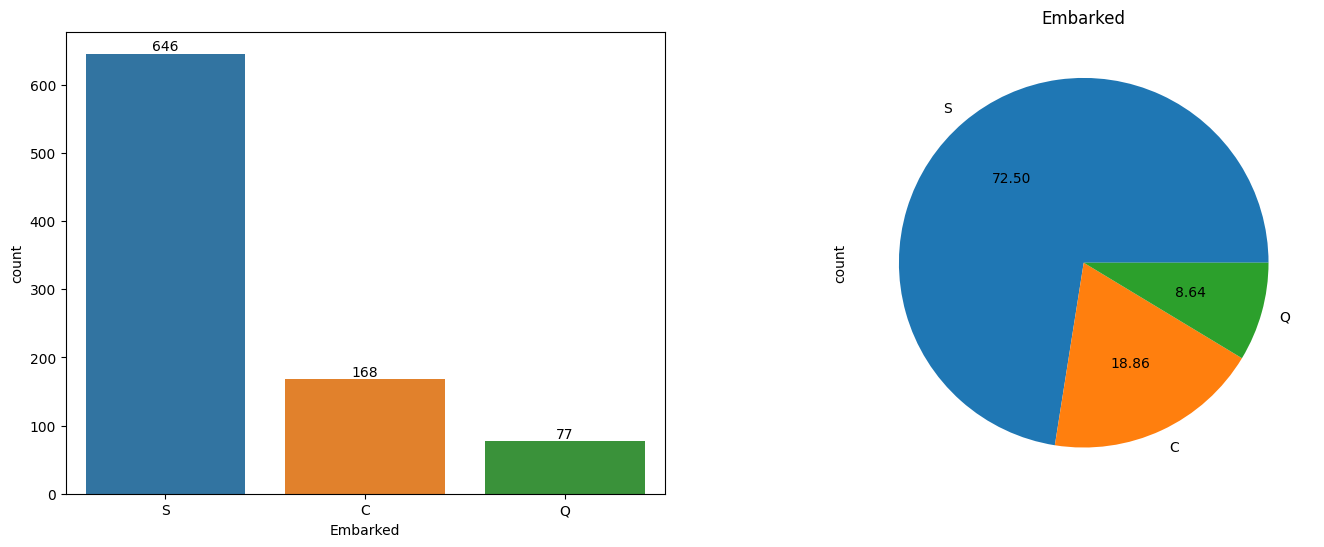

In [25]:
Analysis.UniveriateAnalysis_cat('Embarked')


In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Concating Columns

In [27]:
df['Family'] = df['Parch'] + df['SibSp']
df.drop(labels=['SibSp','Parch'],axis=1 , inplace=True)

In [28]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22,7.0,S,1
1,1,1,female,38,71.0,C,1
2,1,3,female,26,8.0,S,0
3,1,1,female,35,53.0,S,1
4,0,3,male,35,8.0,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27,13.0,S,0
887,1,1,female,19,30.0,S,0
888,0,3,female,38,23.0,S,3
889,1,1,male,26,30.0,C,0


## *Bivariate Analysis*


Matches for Bivariate Analysis

- fare - survived[yes][sex]
- fare - survived[No][sex]
- fare - age [Survived]
- fare - embarked

===================

- age[male] - survived
- age[femal] - survived
- age - sex
- age - embarked
- age - family

===============




<Axes: title={'center': 'fare - embarked'}, xlabel='Fare', ylabel='Count'>

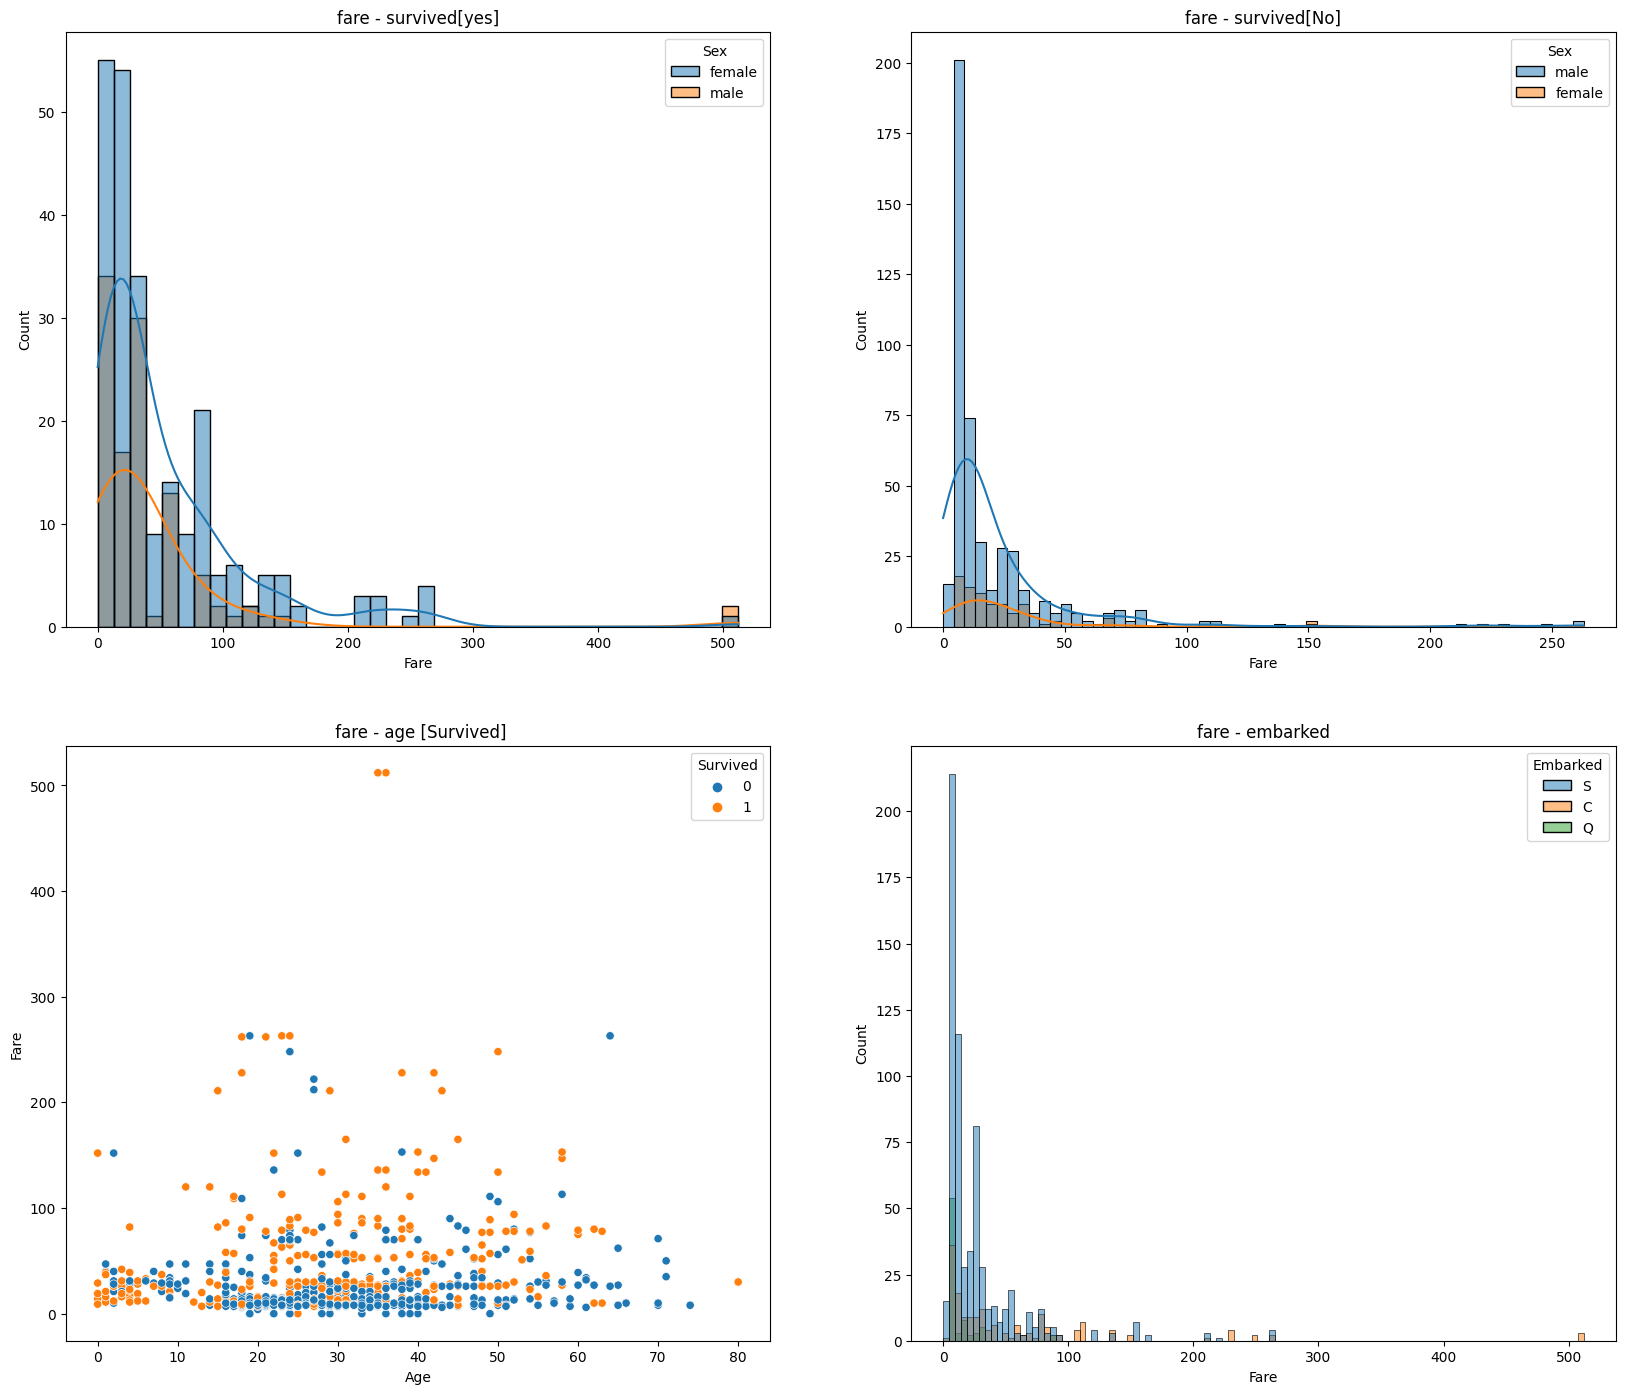

In [29]:
plt.subplots(nrows=2,ncols=2,figsize = (20,17))
plt.subplot(2,2,1)
plt.title('fare - survived[yes]')
sns.histplot(data=df[df['Survived'] == 1],x='Fare',hue='Sex',kde=True)
plt.subplot(2,2,2)
plt.title('fare - survived[No]')
sns.histplot(data=df[df['Survived'] == 0],x='Fare',hue='Sex',kde=True,color='y')
plt.subplot(2,2,3)
plt.title(' fare - age [Survived]')
sns.scatterplot(data=df,y='Fare',x='Age',hue='Survived')
plt.subplot(2,2,4)
plt.title('fare - embarked')
sns.histplot(data=df,x='Fare',hue='Embarked')

- age[male] - survived
- age[femal] - survived
- age - embarked
- age - family


In [30]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22,7.0,S,1
1,1,1,female,38,71.0,C,1
2,1,3,female,26,8.0,S,0
3,1,1,female,35,53.0,S,1
4,0,3,male,35,8.0,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27,13.0,S,0
887,1,1,female,19,30.0,S,0
888,0,3,female,38,23.0,S,3
889,1,1,male,26,30.0,C,0


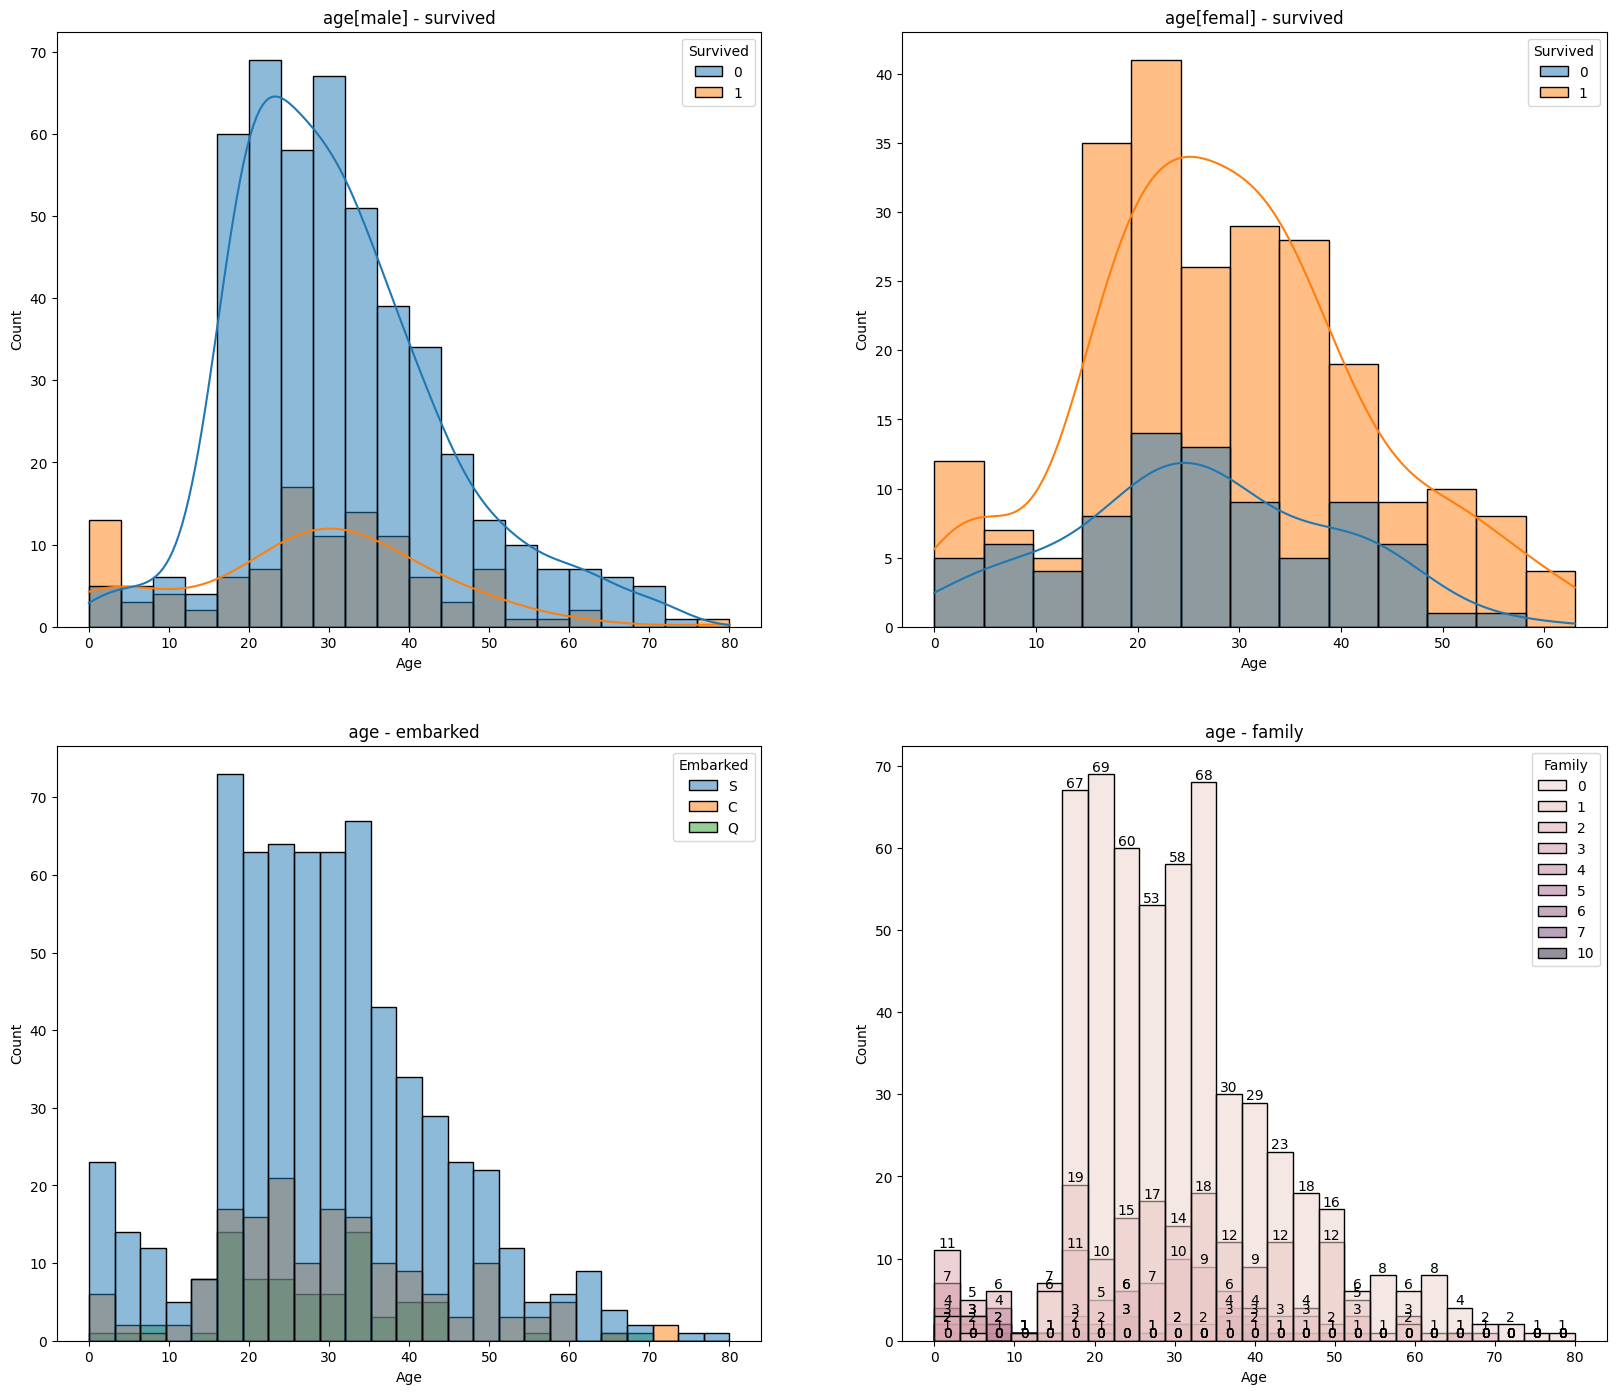

In [31]:
plt.subplots(nrows=2,ncols=2,figsize = (20,17))
plt.subplot(2,2,1)
plt.title('age[male] - survived')
sns.histplot(data=df[df['Sex'] == 'male'],x='Age',hue='Survived',kde=True)
plt.subplot(2,2,2)
plt.title('age[femal] - survived')
sns.histplot(data=df[df['Sex'] == 'female'],x='Age',hue='Survived',kde=True,color='y')
plt.subplot(2,2,3)
plt.title('  age - embarked')
sns.histplot(data=df,x='Age',hue='Embarked',color='g')
plt.subplot(2,2,4)
plt.title('age - family')
ax = sns.histplot(data=df,x='Age',hue='Family')
for i in ax.containers:
    ax.bar_label(i)

# Data Encoding

## Embarked
### As my visualization how all from 'S' they have paid more money to others so here I will do Lable Encoding / Ordinal Encoding

In [32]:
ordinal_Encoder = OrdinalEncoder(categories=[['Q','C','S']])
df['Embarked'] = ordinal_Encoder.fit_transform(df[['Embarked']])


## Sex
### for this I will have to simply do OneHotEncoding

In [33]:
ohe = OneHotEncoder()
age = ohe.fit_transform(df[['Sex']])
age.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [34]:
df_sex = pd.DataFrame(data=age.toarray(),columns=ohe.get_feature_names_out())


## concating df_age and removing age

In [35]:
df = pd.concat(objs=[df,df_sex],axis=1)
df.drop(labels='Sex',axis=1,inplace=True)

## Scaling Fare feature

In [36]:
df['Fare'].describe()

count    891.000000
mean      32.214366
std       49.693352
min        0.000000
25%        8.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [37]:
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [38]:
df['Fare'].describe()

count    8.910000e+02
mean    -2.791133e-17
std      1.000562e+00
min     -6.486272e-01
25%     -4.875494e-01
50%     -3.667411e-01
75%     -2.445091e-02
max      9.660348e+00
Name: Fare, dtype: float64

# Training model 

In [39]:
df

,Survived,Pclass,Age,Fare,Embarked,Family,Sex_female,Sex_male
0,0,3,22,-0.507684,2.0,1,0.0,1.0
1,1,1,38,0.780938,1.0,1,1.0,0.0
2,1,3,26,-0.487549,2.0,0,1.0,0.0
3,1,1,35,0.418513,2.0,1,1.0,0.0
4,0,3,35,-0.487549,2.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,27,-0.386876,2.0,0,0.0,1.0
887,1,1,19,-0.044586,2.0,0,1.0,0.0
888,0,3,38,-0.185529,2.0,3,1.0,0.0
889,1,1,26,-0.044586,1.0,0,0.0,1.0


In [40]:
## Dependent and Independent features
X = df.iloc[:,1:]
y = df['Survived']

In [41]:
## Train test Split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)


In [42]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 7), (712,), (179, 7), (179,))

## Hyper parameter Tuning
with RandomizedSearchCV

In [43]:
param_distribution = { # I will give estimator by my self
    'criterion' : ('gini', 'entropy') ,
    'max_depth' : [60,100,150],
    'max_features' : ('sqrt','log2',None)
}

In [44]:
randCV = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=param_distribution,
                            cv=10,
                            verbose=3,
                            random_state=0
                            )

In [45]:
randCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.750 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.764 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.718 total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.873 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.761 total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.718 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.789 total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.775 total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.704 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.873 total

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [60, 100, 150],
                                        'max_features': ('sqrt', 'log2', None)},
                   random_state=0, verbose=3)

In [46]:
randCV.best_params_

{'max_features': None, 'max_depth': 150, 'criterion': 'gini'}

In [47]:
rand_Forest_clf = RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=150,criterion='gini')

## Model Training Automation

In [48]:
models = {
    'rand_Forest_clf' : RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=150,criterion='gini'),
    'logisticRegresson' : LogisticRegression(),
    'DecisionTree_clf': DecisionTreeClassifier()
}

In [49]:
def best_model(X_train,y_train,X_test,y_test,models):
    report = {}
    for i in range(len(models)):
        model_train = list(models.values())[i]
        # training model
        model_train.fit(X_train,y_train)

        # prediction
        y_pred_test = model_train.predict(X_test)

        # Checking accuracy of model
        model_train_score = accuracy_score(y_true=y_test,y_pred=y_pred_test)

        report[list(models.keys())[i]] = model_train_score
    return report

In [50]:
print(best_model(X_train,y_train,X_test,y_test,models=models))
print(' Random Forest Classifier Accuracy is highest So I will deploy with Decision Tree')

{'rand_Forest_clf': 0.8324022346368715, 'logisticRegresson': 0.8044692737430168, 'DecisionTree_clf': 0.8044692737430168}
 Random Forest Classifier Accuracy is highest So I will deploy with Decision Tree


# **END**